## Processing data ( Normalization and standarization)

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf

In [2]:
insurance = pd.read_csv("https://raw.githubusercontent.com/stedy/Machine-Learning-with-R-datasets/master/insurance.csv")
insurance

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


<Axes: ylabel='Frequency'>

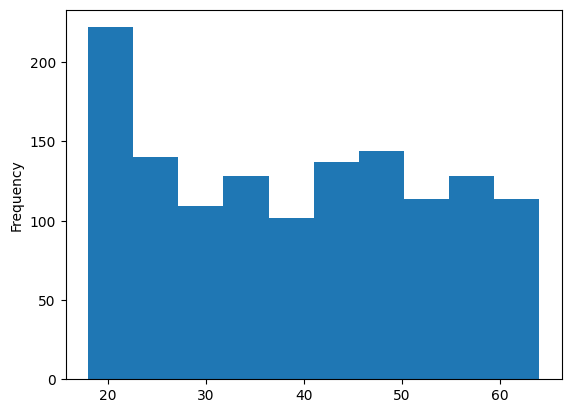

In [3]:
insurance['age'].plot(kind='hist')

<Axes: ylabel='Frequency'>

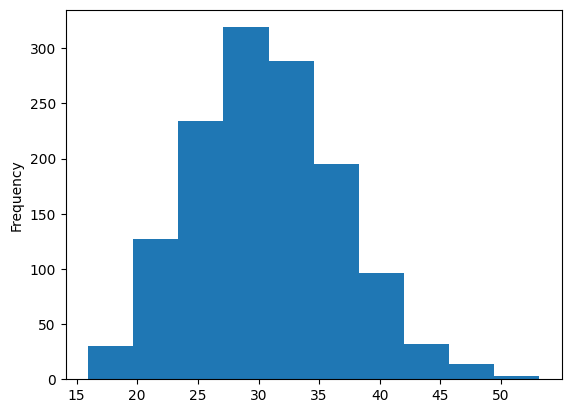

In [4]:
insurance['bmi'].plot(kind='hist')


In [3]:
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder
from sklearn.model_selection import train_test_split

# Create a column transoformer
ct = make_column_transformer(
    (MinMaxScaler(), ['age', 'bmi', 'children']),
    (OneHotEncoder(handle_unknown='ignore'), ['sex', 'smoker', 'region'])
)

# Create X and y
X = insurance.drop('charges', axis=1)
y = insurance['charges']

# Build out train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=20, random_state=42)

# Fit the column transformer to our training data
ct.fit(X_train)

# Transformer training and test data with normalization (MinMaxScaler) and OneHotEncdoder
X_train_normal = ct.transform(X_train)
X_test_normal = ct.transform(X_test)

In [4]:
X_train

,age,sex,bmi,children,smoker,region
413,25,male,23.900,5,no,southwest
598,43,male,32.600,2,no,southwest
513,19,male,30.400,0,no,southwest
78,22,female,39.805,0,no,northeast
1135,50,female,28.120,3,no,northwest
...,...,...,...,...,...,...
1095,18,female,31.350,4,no,northeast
1130,39,female,23.870,5,no,southeast
1294,58,male,25.175,0,no,northeast
860,37,female,47.600,2,yes,southwest


In [7]:
X_train_normal[0]

array([0.15217391, 0.21361313, 1.        , 0.        , 1.        ,
       1.        , 0.        , 0.        , 0.        , 0.        ,
       1.        ])

In [8]:
X_train.shape, X_train_normal.shape

((1318, 6), (1318, 11))

Build a neural network model

In [10]:
# Build a neural network model to fit on our normalized data
tf.random.set_seed(42)

# Create the model
insurance_model = tf.keras.Sequential([
    tf.keras.layers.Dense(100),
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])

# Compile the model
insurance_model.compile(loss=tf.keras.losses.mae,
                        optimizer=tf.keras.optimizers.Adam(),
                        metrics=['mae']
                       )

insurance_model.fit(X_train_normal, y_train, epochs=100)

Epoch 1/100
42/42 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - loss: 13387.5010 - mae: 13387.5010
Epoch 2/100
42/42 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 13377.9209 - mae: 13377.9209
Epoch 3/100
42/42 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 13349.1660 - mae: 13349.1660
Epoch 4/100
42/42 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 13281.3984 - mae: 13281.3984
Epoch 5/100
42/42 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 13153.2373 - mae: 13153.2373
Epoch 6/100
42/42 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 12944.3730 - mae: 12944.3730
Epoch 7/100
42/42 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 12635.6455 - mae: 12635.6455
Epoch 8/100
42/42 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 12209.0371 - mae: 12209.0371
Epoch 9/100
42/42 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 11664.1934 - mae: 11664.1934
Epoch 10/100
42/42 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 11053.6885 - mae: 11053.6885
Epoch 11/100
42/42 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 10434.5771 - mae: 10434.5771
Epoch 12/100
42/42 ━━━━━━━━━━━

In [11]:
# Evaluate out insurance model trained on normalized data
insurance_model.evaluate(X_test_normal, y_test)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 262ms/step - loss: 4353.9248 - mae: 4353.9248


[4353.9248046875, 4353.9248046875]

In [ ]:
# Insurance mode